In [1]:
#### RUL-Prognosis based on IEEE PHM 2012 data set

# Step1: Download IEEE PHM 2012 data set
# Step2: Adapt path for Training- and Test data

#Train data = Bearing1_1
#Test data = Bearing1_3
#Prognosis = Support Vector Regression

# Libraries

import pandas as pd 
import glob
import numpy as np
from matplotlib import pyplot as plt

# Load training data

path = r'C:\git\phm-ieee-2012-data-challenge-dataset\Learning_set\Bearing1_1'
all_files = glob.glob(path + "/*.csv")


In [2]:
all_files

['C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00001.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00002.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00003.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00004.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00005.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00006.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00007.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00008.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00009.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00010.csv',
 'C:\\git\\phm-ieee-2012-data-challenge-dataset\\Learning_set\\Bearing1_1\\acc_00011.csv',

In [3]:
# Laden der Trainingsdaten
train_data = pd.read_csv(all_files[2800], decimal='.', sep=',', header=None)

In [4]:
# Show training data
train_data

,0,1,2,3,4,5
0,17,26,19,65664.0,-0.048,0.536
1,17,26,19,65703.0,2.813,0.291
2,17,26,19,65742.0,5.034,-2.402
3,17,26,19,65781.0,3.179,-1.194
4,17,26,19,65820.0,3.823,3.728
...,...,...,...,...,...,...
2555,17,26,19,165470.0,-2.023,1.431
2556,17,26,19,165510.0,1.223,0.785
2557,17,26,19,165550.0,-1.724,-2.009
2558,17,26,19,165580.0,-1.162,0.585


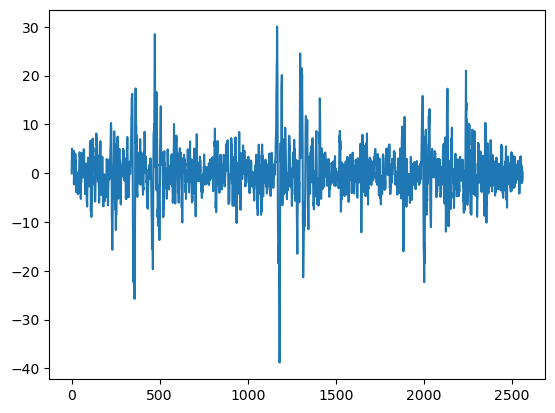

In [5]:
#visualize the data

plt.plot(train_data.iloc[:,4])

In [6]:
#Merge data

for i in range(0, 2803):
    
    train_data = pd.read_csv(all_files[i], decimal='.', sep=',', header=None)
    
    if (i==0):
        train_list = train_data
    #end if
    
    if (i>0):
        train_list = pd.concat([train_list, train_data], axis=0)
    #end if
    
#end for


In [7]:
# reset the index

train_list = train_list.reset_index(drop=True)

In [8]:
train_list

,0,1,2,3,4,5
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
7175675,17,26,39,165470.0,-3.353,2.129
7175676,17,26,39,165510.0,-2.868,-2.299
7175677,17,26,39,165550.0,-5.507,-1.844
7175678,17,26,39,165580.0,-3.578,2.146


Text(0, 0.5, 'acc')

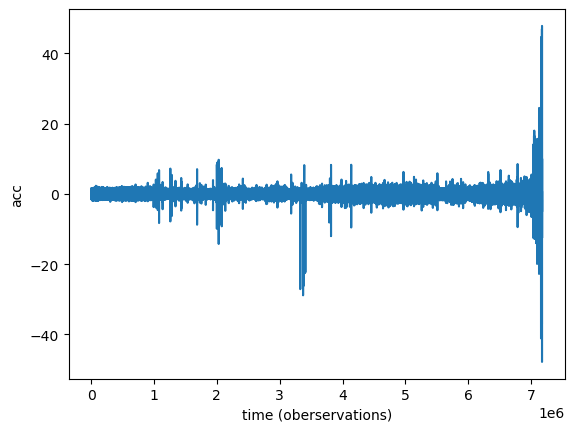

In [9]:
#select signal in data set
signal = train_list.iloc[:,5]


#plot the signal
plt.plot(signal)
plt.xlabel("time (oberservations)")
plt.ylabel("acc")

In [10]:
#convert to array
signal_array = np.array(signal)

In [11]:
#find first value over 20g and cut the time series

first_value_Over_20g = np.where(abs(signal_array) > 20)
#first_value_Over_20g

In [12]:
#cut the time series

train_list_array_cut = signal_array[0: first_value_Over_20g[0][0] +1]
train_list_array_cut
print( len(train_list_array_cut) )
print( len(signal_array) )

3327315
7175680


In [13]:
# create windows of window length wl until acceleration reaches 20g

#window length 
wl = 2560

#step
step = 2560



#create empty list
windows = []

start_window = 0
end_window = start_window + wl

while (end_window < len(train_list_array_cut)):
    
    start_window =  start_window + step
    end_window = start_window + wl
   
    windows.append( train_list_array_cut[start_window:end_window] ) 
    
#end for

In [14]:
# extract features from training data

#import librariies
import scipy.stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import iqr


extracted_features = []

for i in range(0, len(windows)):
    
    mean = np.mean(windows[i])
    std = np.std(windows[i])
    rms = np.sqrt(np.mean(windows[i]**2))
    skewness = skew(windows[i])
    kurt = kurtosis(windows[i])
    SNR = np.log10( (mean**2 / std**2))
    peaktopeak = abs(np.max(abs(windows[i])) - np.min(abs(windows[i])))
    crest_factor = np.max(abs(windows[i])) / rms
    shape_factor = rms / np.max(abs(windows[i]))
    iqr7525 = iqr(windows[i])
    integral = np.trapz(windows[i])
    
    extracted_features.append([mean, std, rms, skewness, kurt, SNR, peaktopeak, crest_factor, shape_factor, iqr7525, integral])
    
#end for



Text(0, 0.5, 'feature values')

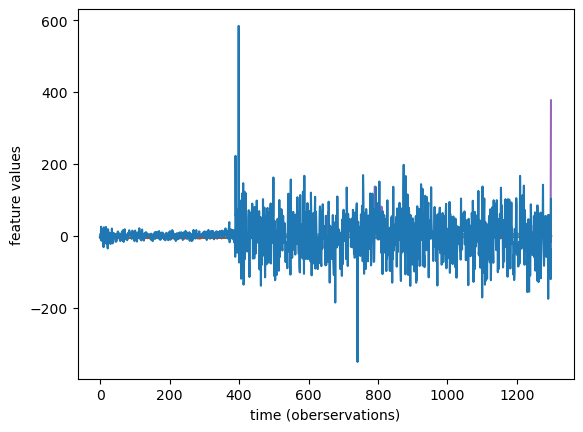

In [15]:
# plot the std over all windows (time)
plt.plot(extracted_features)

plt.xlabel("time (oberservations)")
plt.ylabel("feature values")

In [16]:
# Create a RUL target vector

# lifetime bearing in hours
lifetime = 7.6796

number_windows = len(windows)

RUL = np.linspace(lifetime, 0, number_windows)

In [17]:
# train the ML model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# grid search

X_train = extracted_features
y_train = RUL

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10], 'epsilon':[0.01, 0.9]}
svr= SVR()
clf = GridSearchCV(svr, parameters)

regr = make_pipeline(StandardScaler(), clf)
regr.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(estimator=SVR(),
                              param_grid={'C': [1, 10], 'epsilon': [0.01, 0.9],
                                          'kernel': ('linear', 'poly', 'rbf',
                                                     'sigmoid')}))])

In [18]:
# load test data

path = r'C:\git\phm-ieee-2012-data-challenge-dataset\Test_set\Bearing1_3'
all_files = glob.glob(path + "/*.csv")

# Laden der Trainingsdaten
test_data = pd.read_csv(all_files[1801], decimal='.', sep=',', header=None)
test_data

,0,1,2,3,4,5
0,13,33,11,378160.0,-0.270,0.681
1,13,33,11,378200.0,-0.122,0.697
2,13,33,11,378240.0,-0.302,0.414
3,13,33,11,378280.0,-0.395,0.390
4,13,33,11,378320.0,-0.476,0.708
...,...,...,...,...,...,...
2555,13,33,11,477970.0,-0.566,0.255
2556,13,33,11,478010.0,-0.528,0.779
2557,13,33,11,478050.0,-0.732,0.532
2558,13,33,11,478080.0,-0.284,-0.130


In [19]:
#Merge data

for i in range(0, 1801):
    
    test_data = pd.read_csv(all_files[i], decimal='.', sep=',', header=None)
    
    if (i==0):
        test_list = test_data
    #end if
    
    if (i>0):
        test_list = pd.concat([test_list, test_data], axis=0)
    #end if
    
#end for

test_list = test_list.reset_index(drop=True)

test_list

,0,1,2,3,4,5
0,8,33,1,378160.0,0.092,0.044
1,8,33,1,378200.0,-0.025,0.432
2,8,33,1,378240.0,-0.104,0.008
3,8,33,1,378280.0,0.056,-0.264
4,8,33,1,378320.0,0.074,-0.195
...,...,...,...,...,...,...
4610555,13,33,1,477970.0,0.460,1.871
4610556,13,33,1,478010.0,0.089,2.065
4610557,13,33,1,478050.0,-0.170,2.068
4610558,13,33,1,478080.0,-0.566,2.087


Text(0, 0.5, 'acc')

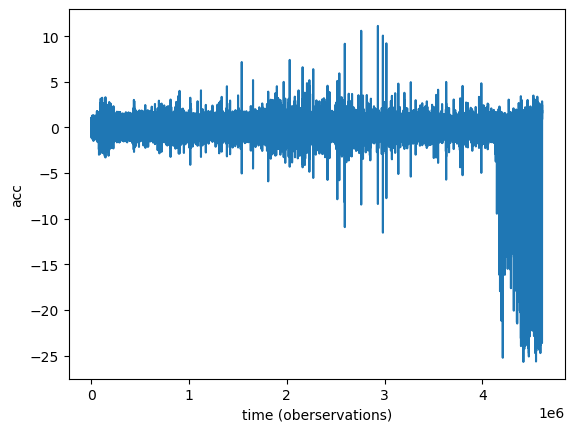

In [20]:
## select signal in test data set
signal = test_list.iloc[:,5]


#plot the signal
plt.plot(signal)
plt.xlabel("time (oberservations)")
plt.ylabel("acc")


In [21]:
#convert to array
signal_array = np.array(signal)

#find first value over 20g and cut the time series

first_value_Over_20g = np.where(abs(signal_array) > 20)
first_value_Over_20g

(array([4193276, 4193279, 4208328, 4208329, 4208330, 4208334, 4208335,
        4208336, 4208338, 4208341, 4321047, 4353086, 4353088, 4353090,
        4354997, 4355859, 4387840, 4387843, 4393824, 4394613, 4394618,
        4394620, 4394624, 4394626, 4394630, 4394645, 4394648, 4394654,
        4394657, 4401459, 4401462, 4402301, 4402304, 4403780, 4409515,
        4410347, 4410356, 4418844, 4419119, 4419120, 4419121, 4421001,
        4421004, 4424652, 4427524, 4428302, 4436977, 4436979, 4439606,
        4441092, 4441298, 4441303, 4447768, 4452151, 4458745, 4462718,
        4462722, 4463539, 4463543, 4464401, 4464413, 4469062, 4469065,
        4469066, 4469197, 4469198, 4470166, 4475036, 4475039, 4475041,
        4475043, 4475053, 4475055, 4475068, 4475886, 4475891, 4475892,
        4475893, 4475897, 4475899, 4475902, 4475908, 4475910, 4475911,
        4475912, 4475914, 4475916, 4475918, 4475922, 4475928, 4476739,
        4482476, 4482480, 4482482, 4491774, 4511505, 4519725, 4519726,
      

In [22]:
#cut the time series

test_list_array_cut = signal_array[0: first_value_Over_20g[0][0] +1]
test_list_array_cut
print( len(test_list_array_cut) )
print( len(signal_array) )

4193277
4610560


In [23]:
# create windows of window length wl until acceleration reaches 20g

#window length 
wl = 2560

#step
step = 2560



#create empty list
windows = []

start_window = 0
end_window = start_window + wl

while (end_window < len(test_list_array_cut)):
    
    start_window =  start_window + step
    end_window = start_window + wl
   
    windows.append( test_list_array_cut[start_window:end_window] ) 
    
#end for

In [24]:
# extract features from training data

#import librariies
import scipy.stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import iqr


extracted_features = []

for i in range(0, len(windows)):
    
    mean = np.mean(windows[i])
    std = np.std(windows[i])
    rms = np.sqrt(np.mean(windows[i]**2))
    skewness = skew(windows[i])
    kurt = kurtosis(windows[i])
    SNR = np.log10( (mean**2 / std**2))
    peaktopeak = abs(np.max(abs(windows[i])) - np.min(abs(windows[i])))
    crest_factor = np.max(abs(windows[i])) / rms
    shape_factor = rms / np.max(abs(windows[i]))
    iqr7525 = iqr(windows[i])
    integral = np.trapz(windows[i])
    
    extracted_features.append([mean, std, rms, skewness, kurt, SNR, peaktopeak, crest_factor, shape_factor, iqr7525, integral])
    
#end for



In [25]:
# Create a RUL target vector test set

# lifetime bearing in hours
lifetime = 5 * 4520576 / 4610560

number_windows = len(windows)

RUL = np.linspace(lifetime, 0, number_windows)

In [26]:
# make predictions using the ML model

from sklearn.metrics import mean_squared_error

X_test = extracted_features
y_test = RUL

y_pred = regr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MSE

1.4708812159791456

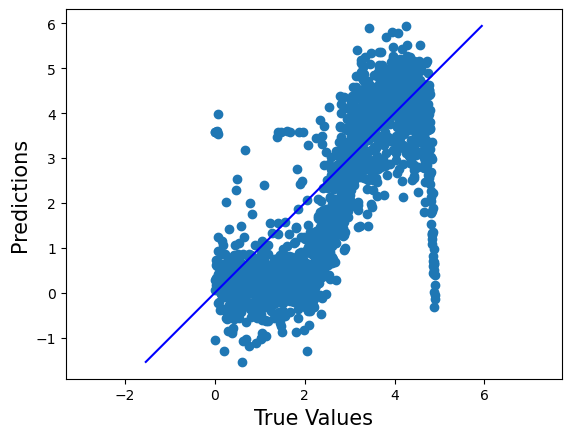

In [27]:
#plot the results


plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_pred))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

